# Building Basic predictive models over the NYC Taxi Trip dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
np.sum(pd.isnull(df))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [403]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# 1. Choose the most suitable evaluation metric and state why you chose it.


# Target variable is "trip_duration" which is a continuous variable so i will be making use of root mean square error RMSE as the evaluation matrix which works upon regression problems which calculates the difference between actual and predicted values

In [404]:
#check inconsistency in data given
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

In [405]:
df['pickup_day_of_week'] = df['pickup_datetime'].dt.weekday
df['dropoff_day_of_week']= df['dropoff_datetime'].dt.weekday
df['pickup_hour_of_day'] = df['pickup_datetime'].dt.hour
df['dropoff_hour_of_day'] = df['dropoff_datetime'].dt.hour
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['dropoff_date'] = df['dropoff_datetime'].dt.date


In [406]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day_of_week,dropoff_day_of_week,pickup_hour_of_day,dropoff_hour_of_day,pickup_month,dropoff_month,pickup_date,dropoff_date
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0,0,0,16,16,2,2,2016-02-29,2016-02-29
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0,4,4,23,23,3,3,2016-03-11,2016-03-11
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0,6,6,17,18,2,2,2016-02-21,2016-02-21
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0,1,1,9,10,1,1,2016-01-05,2016-01-05
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0,2,2,6,6,2,2,2016-02-17,2016-02-17


In [407]:
cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

df['Pick_time_frame'] = pd.cut(df['pickup_hour_of_day'],bins=cut_bins,labels=names)

df['drop_time_frame'] = pd.cut(df['dropoff_hour_of_day'],bins=cut_bins,labels=names)


In [408]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_of_week,dropoff_day_of_week,pickup_hour_of_day,dropoff_hour_of_day,pickup_month,dropoff_month,pickup_date,dropoff_date,Pick_time_frame,drop_time_frame
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,...,0,0,16,16,2,2,2016-02-29,2016-02-29,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,...,4,4,23,23,3,3,2016-03-11,2016-03-11,Night,Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,...,6,6,17,18,2,2,2016-02-21,2016-02-21,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,...,1,1,9,10,1,1,2016-01-05,2016-01-05,Office Hours,Office Hours
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,...,2,2,6,6,2,2,2016-02-17,2016-02-17,Office Hours,Office Hours


In [409]:
df['drop_time_frame'].value_counts()

Evening          203439
Noon Hours       176966
Office Hours     138571
Night            119172
Early Morning     62261
Name: drop_time_frame, dtype: int64

In [410]:
df['Pick_time_frame'].value_counts()

Evening          203291
Noon Hours       178318
Office Hours     144605
Night            117407
Early Morning     58975
Name: Pick_time_frame, dtype: int64

In [411]:
#difference between pick and drop time frame show that some trip duration were very long
# Trip duration in hours
df['trip_duration'] = df['trip_duration']/3600

df['trip_duration'].describe() 


count    729322.000000
mean          0.264508
std           1.073507
min           0.000278
25%           0.110278
50%           0.184167
75%           0.298611
max         538.815556
Name: trip_duration, dtype: float64

In [412]:
df.drop(columns=['check_trip_duration','pickup_hour_of_day','pickup_day_of_week','pickup_month','dropoff_hour_of_day','dropoff_day_of_week','dropoff_month'], inplace=True)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,Pick_time_frame,drop_time_frame
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,0.111111,2016-02-29,2016-02-29,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,0.305556,2016-03-11,2016-03-11,Night,Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,0.454167,2016-02-21,2016-02-21,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,0.316944,2016-01-05,2016-01-05,Office Hours,Office Hours
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,0.235556,2016-02-17,2016-02-17,Office Hours,Office Hours


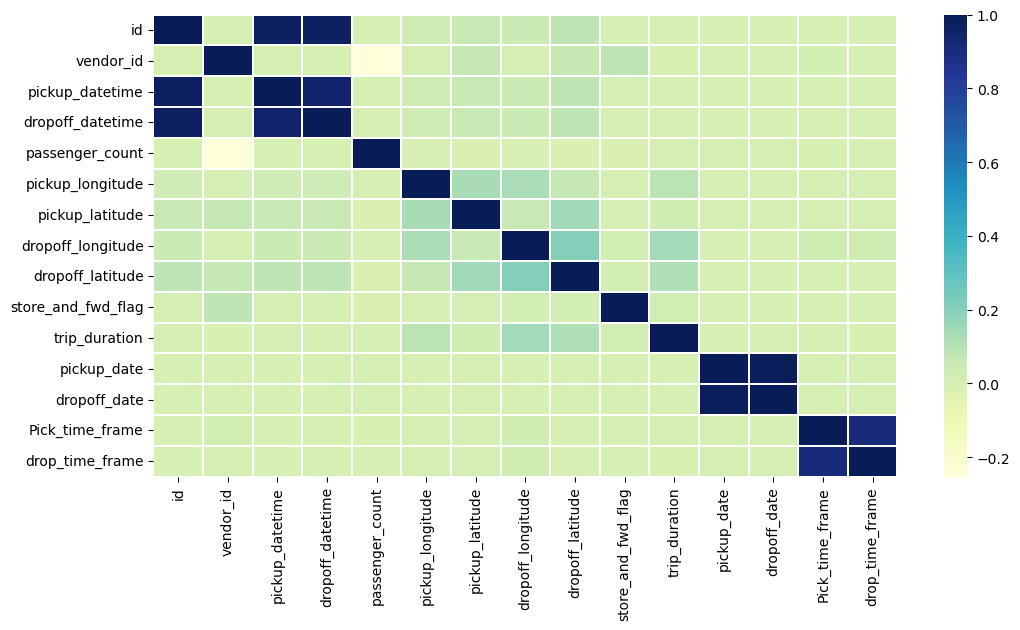

In [413]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

# 2. Building regression benchmark model


In [414]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(df, random_state = 42)


# #creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1:]
test = data.loc[3*div+1:]

In [415]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,Pick_time_frame,drop_time_frame
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,0,0.182500,2016-05-21,2016-05-21,Office Hours,Office Hours
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,0,0.054167,2016-01-08,2016-01-08,Evening,Evening
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,0,0.233333,2016-05-22,2016-05-22,NaN,Early Morning
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,0,0.110556,2016-06-11,2016-06-11,Office Hours,Office Hours
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,0,0.189444,2016-04-03,2016-04-03,Office Hours,Office Hours


In [416]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,Pick_time_frame,drop_time_frame
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,0,0.096111,2016-05-25,2016-05-25,Office Hours,Office Hours
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,0,0.066667,2016-01-18,2016-01-18,Noon Hours,Noon Hours
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,0,0.186389,2016-03-02,2016-03-02,Evening,Evening
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,0,0.011944,2016-04-06,2016-04-06,Evening,Evening
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,0,0.090278,2016-06-21,2016-06-21,Evening,Evening


In [417]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [418]:
#calculating MSE
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
simple_mean_error = mse(test['trip_duration'] , test['simple_mean'])
simple_mean_error

0.792824508228472

In [419]:
pick = pd.pivot_table(train, values='trip_duration', index = ['Pick_time_frame'], aggfunc=np.mean)
pick

,trip_duration
Pick_time_frame,
Early Morning,0.244862
Office Hours,0.247429
Noon Hours,0.286309
Evening,0.267637
Night,0.253974


In [420]:
# initializing new column to zero
test['pick_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['Pick_time_frame'].unique():
  # Assign the mean value corresponding to unique entry
  test['pick_mean'][test['Pick_time_frame'] == str(i)] = train['trip_duration'][train['Pick_time_frame'] == str(i)].mean()

In [421]:
#calculating MSE
Pick_time_frame_error = mse(test['trip_duration'] , test['pick_mean'] )
Pick_time_frame_error

0.7950375516855338

In [422]:
drop = pd.pivot_table(train, values='trip_duration', index = ['drop_time_frame'], aggfunc=np.mean)
drop

,trip_duration
drop_time_frame,
Early Morning,0.243837
Office Hours,0.240820
Noon Hours,0.282987
Evening,0.273421
Night,0.252402


In [423]:
# initializing new column to zero
test['drop_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['drop_time_frame'].unique():
  # Assign the mean value corresponding to unique entry
  test['drop_mean'][test['drop_time_frame'] == str(i)] = train['trip_duration'][train['drop_time_frame'] == str(i)].mean()

In [424]:
#calculating MSE
drop_time_frame_error = mse(test['trip_duration'] , test['drop_mean'] )
drop_time_frame_error

0.796417421901544

In [425]:
#trip duration with respect to the mean of passenger count
pass_count = pd.pivot_table(train, values='trip_duration', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration
passenger_count,
0,0.092981
1,0.255343
2,0.277822
3,0.287332
4,0.285759
5,0.299641
6,0.300193


In [426]:
# initializing new column to zero
test['pass_count_mean'] = 0

# For every unique entry in passenger count
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['pass_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [427]:
pass_count_error = sqrt(mse(test['trip_duration'] , test['pass_count_mean'] ))
pass_count_error

0.9290781075032716

In [428]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['Pick_time_frame','drop_time_frame'], aggfunc = np.mean)
combo

trip_duration
Pick_time_frame drop_time_frame               
Early Morning   Early Morning         0.234795
                Office Hours          0.313575
                Noon Hours           12.009722
                Night                22.514444
Office Hours    Early Morning        22.632153
                Office Hours          0.237621
                Noon Hours            0.363283
Noon Hours      Office Hours         23.076035
                Noon Hours            0.272590
                Evening               0.475664
Evening         Early Morning         4.823056
                Noon Hours           22.873556
                Evening               0.262554
                Night                 0.316452
Night           Early Morning         1.388611
                Noon Hours           14.548889
                Evening              23.312315
                Night                 0.245928

In [429]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
#s3='drop_time_frame'
s2 = 'Pick_time_frame'
s1 = 'drop_time_frame'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
        #for k in test[s3].unique():
        test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()
            
#     # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
#     test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['Item_Outlet_Sales'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [430]:
super_error = sqrt(mse(test['trip_duration'] ,test['Super_mean'] ))
super_error

0.8775725170683301

In [431]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['passenger_count','Pick_time_frame','drop_time_frame'], aggfunc = np.mean)
combo

trip_duration
passenger_count Pick_time_frame drop_time_frame               
0               Early Morning   Early Morning         0.035222
                Office Hours    Office Hours          0.302593
                Noon Hours      Noon Hours            0.347685
                Evening         Evening               0.059389
                Night           Night                 0.028722
...                                                        ...
6               Evening         Noon Hours           23.433426
                                Evening               0.289049
                                Night                 0.304013
                Night           Evening              23.385833
                                Night                 0.263056

[76 rows x 1 columns]

# 3. Building KNN model


In [432]:
#removing outliers
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [433]:
df = df.loc[~(df['passenger_count'] == 0)]
df = df.loc[~(df['passenger_count'] == 7)]
df = df.loc[~(df['passenger_count'] == 9)]


In [434]:

df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [435]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                float64
pickup_date                   object
dropoff_date                  object
Pick_time_frame             category
drop_time_frame             category
dtype: object

In [436]:
sample = df.sample(100000)

In [437]:
#seperate features and target
features =pd.DataFrame(sample,columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
target = sample["trip_duration"]

In [438]:
features = pd.concat([features, pd.get_dummies(features[['passenger_count']].astype('str'))], axis=1)
features.drop(columns=['passenger_count'],inplace=True)



In [439]:
features.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
174745,-73.979309,40.757771,-73.979698,40.733383,0,0,0,1,0,0
622168,-73.952690,40.776630,-73.964828,40.759830,1,0,0,0,0,0
525313,-73.983871,40.769657,-73.865913,40.770924,0,0,0,0,0,1
578762,-73.982025,40.778214,-73.988869,40.774834,1,0,0,0,0,0
175403,-73.984718,40.766033,-73.993706,40.767593,0,1,0,0,0,0


In [440]:
target.head()

174745    0.252222
622168    0.166667
525313    0.521944
578762    0.052778
175403    0.077222
Name: trip_duration, dtype: float64

In [441]:
features.shape,target.shape

((100000, 10), (100000,))

In [442]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(features)

In [443]:
features = pd.DataFrame(x_scaled, columns = features.columns)

In [444]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(features,target, random_state = 56)

In [445]:
#importing KNN classifier and metric F1score and mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import f1_score
# from sklearn.metrics import mean_squared_error as mse
# from math import sqrt

In [446]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.8835505485160743


# Finding k value

In [447]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [144]:
#Defining K range
k = range(1,60)

In [145]:
# calling above defined function
test = Elbow(k)

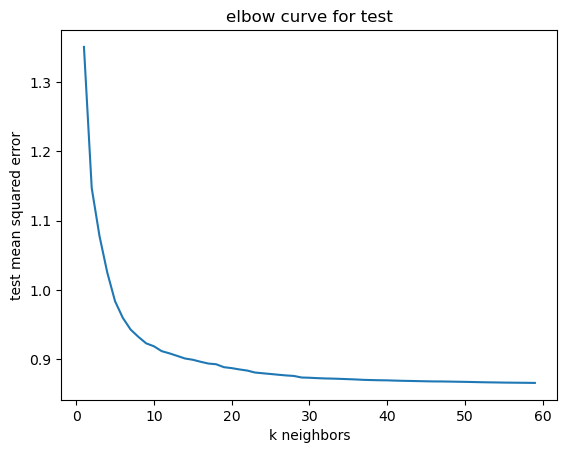

In [146]:
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")
plt.show()

In [147]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9584984313281791


# Best value of k would be 10

In [148]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

13.454259196897201

In [149]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-4.777545042276254

# 4. Building Linear Regression Model


In [448]:
sample = df.sample(100000)

In [449]:
#seperate features and target
features =pd.DataFrame(sample,columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
target = sample["trip_duration"]


In [450]:
features = pd.concat([features, pd.get_dummies(features[['passenger_count']].astype('str'))], axis=1)
features.drop(columns=['passenger_count'],inplace=True)



In [451]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=56)

In [452]:
#creating an instance of LR
lr = LR()
#fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [453]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.8263701484651282


In [454]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  0.8639715079190173


In [455]:
#coefficients of linear regression model
lr.coef_

array([ 1.13018028, -0.51893093,  0.67624903, -0.44731112, -0.03933796,
       -0.01000372, -0.0065335 , -0.00962059,  0.02180473,  0.04369105])

Text(0.5, 1.0, 'Coefficient plot')

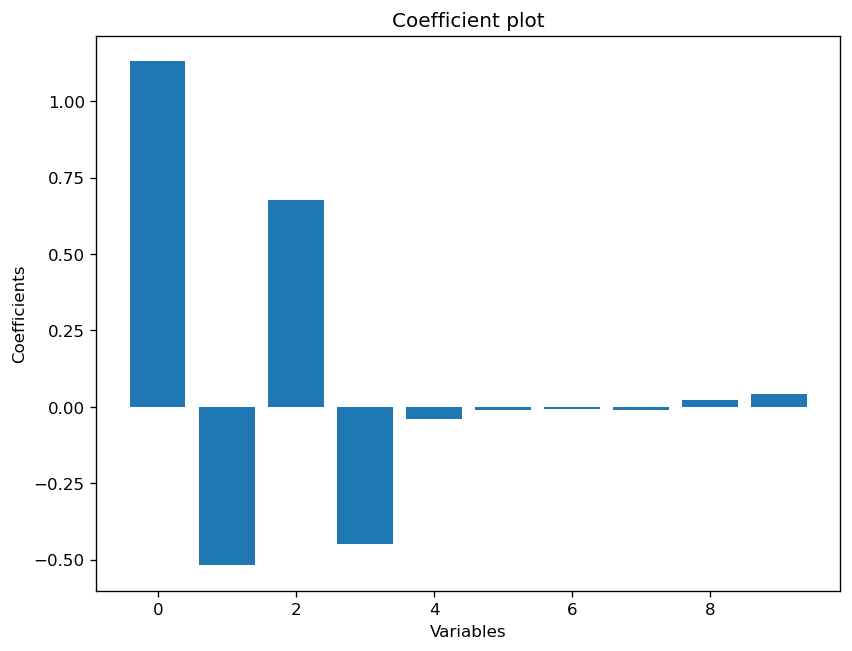

In [456]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [457]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
230338,0.162778,0.248485,-0.085707
632637,0.034722,0.254715,-0.219993
305514,0.460278,0.255425,0.204853
437533,0.168889,0.247308,-0.078419
185163,0.601111,0.231020,0.370091


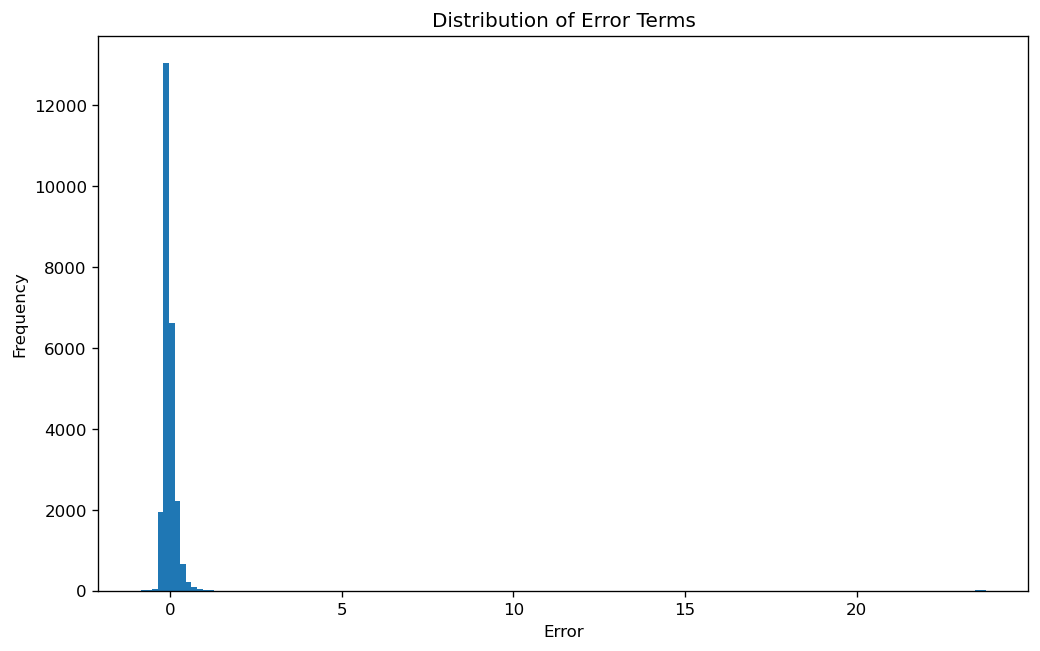

In [458]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

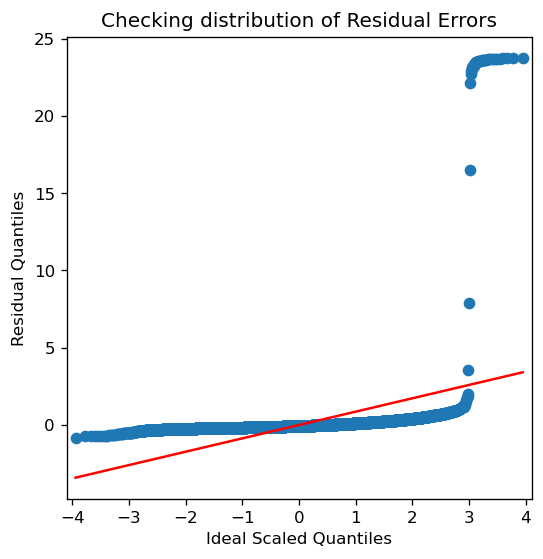

In [459]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)

qqplot(residuals.residuals, line = 's',ax=ax )
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

# Model Interpretability

In [460]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [461]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)


training rmse  0.8263718525727447


In [462]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  0.8639754403530445


In [463]:
# Arranging and calculating the Residuals
coef = pd.DataFrame({
     'Variable'    : features.columns,
     'coefficient' : lr.coef_
})

coef.head()

,Variable,coefficient
0,pickup_longitude,1.129588e+00
1,pickup_latitude,-5.244715e-01
2,dropoff_longitude,6.764546e-01
3,dropoff_latitude,-4.461121e-01
4,passenger_count_1,-4.101085e+12


Text(0.5, 1.0, 'Normalized Coefficient plot')

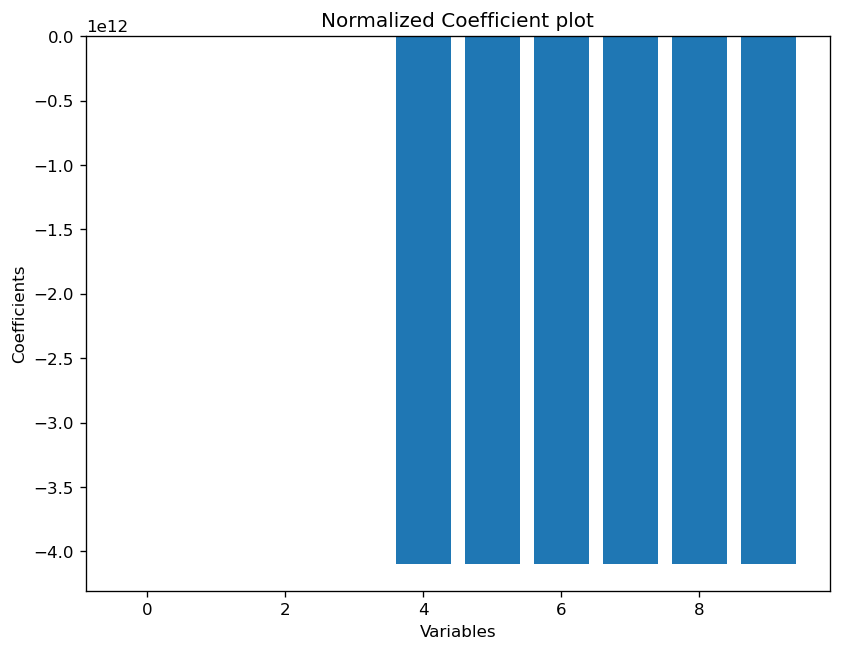

In [464]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [465]:
linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

0.7793298481161504

In [466]:
linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.85016828525597

# CONCLUSION 
# 1. The training and test RMSE has a huge difference
# 2. On computing the coefficients we see there are some negative values as well
# 3. On plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles

# 5. Building Decision Tree Model

In [467]:
features =pd.DataFrame(sample,columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
target= sample["trip_duration"]

In [468]:
features = pd.concat([features, pd.get_dummies(features[['passenger_count']].astype('str'))], axis=1)
features.drop(columns=['passenger_count'],inplace=True)




In [469]:
features.shape

(100000, 10)

In [470]:
train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=55)

In [471]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(features, target)

DecisionTreeRegressor()

In [472]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  9.682458365518544e-05


In [473]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = sqrt(mse(test_predict,test_y))
print("testing rmse ",k1)

testing rmse  0.0


# Interpret the variable importance.

In [474]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


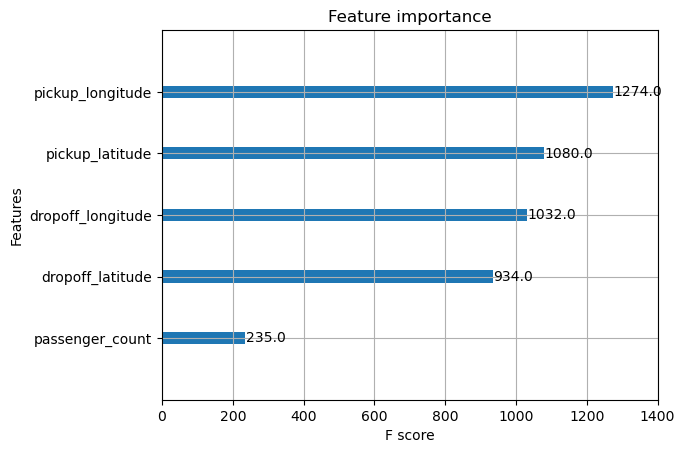

In [475]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(X,Y)
plot_importance(model._Booster)

plt.show()

In [476]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

99.99999871216221

In [477]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

100.0

# CONCLUSION
# 1. The training RMSE of decision model is almost equal to testing RMSE so its the best fit
# 2. The train score and test score is 99.99 so we can say that decision tree is the best model for predicting the trip duration variable.


# 6. Building Bar Plot

In [478]:
#assining the train score values in x,y
x=["decision_train_score","linear_train_score","knn_train_score"]
y=[decision_test_score,linear_train_score, knn_train_score]

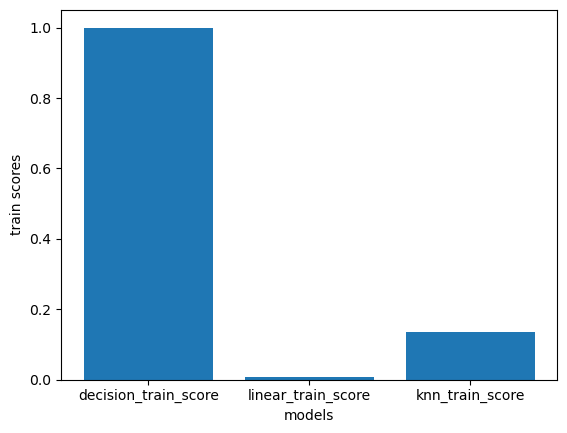

In [479]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [480]:
#assining the test score value in x1,y1
x1=["decision_test_score","linear_test_score","knn_test_score"]
y1=[decision_test_score,linear_test_score,knn_test_score]

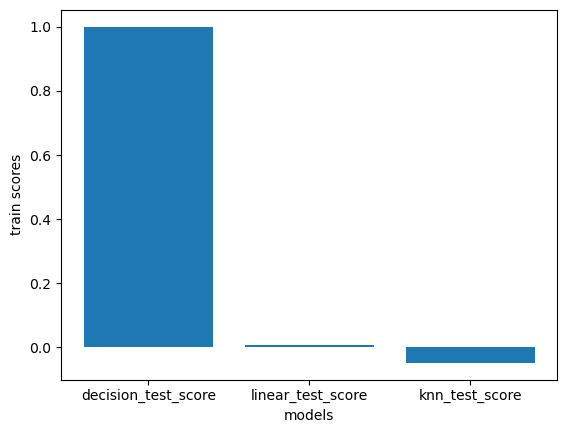

In [481]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

# from graph we can see that the best model among KNN LR and DT(decision tree) the best one is DT in train score